In [78]:
from datetime import datetime

start_time = datetime.now()

print('Excecution started at {}'.format(start_time))

Excecution started at 2023-01-11 12:03:35.370001


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math


import warnings
warnings.filterwarnings('ignore')

print("Imported the libraries for EDA")

Imported the libraries for EDA


### Read data and create a dataframe

In [80]:
raw_data = pd.read_excel('../data/data.xlsx', engine = 'openpyxl', sheet_name = 'Sheet1')
raw_data.columns = raw_data.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and')
raw_data.head()

,Date,Bill_Number,Item_Desc,Time,Quantity,Rate,Tax,Discount,Total,Category
0,2010-04-01,G0470115,QUA MINERAL WATER(1000ML),13:15:11,1,50.0,11.88,0.0,61.88,BEVERAGE
1,2010-04-01,G0470115,MONSOON MALABAR (AULAIT),13:15:11,1,100.0,23.75,0.0,123.75,BEVERAGE
2,2010-04-01,G0470116,MASALA CHAI CUTTING,13:17:35,1,40.0,9.50,0.0,49.50,BEVERAGE
3,2010-04-01,G0470117,QUA MINERAL WATER(1000ML),13:19:55,1,50.0,11.88,0.0,61.88,BEVERAGE
4,2010-04-01,G0470283,MOROCCAN MINT TEA,01:20:18,1,45.0,10.69,0.0,55.69,BEVERAGE


In [81]:
raw_data.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Date,145830,365,2010-12-31 00:00:00,834,2010-04-01,2011-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bill_Number,145830,69982,G0490530,23,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Desc,145830,580,NIRVANA HOOKAH SINGLE,8553,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,145830,36200,22:25:36,33,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,145830.0,NaN,NaN,NaN,NaT,NaT,1.121299,0.477237,1.0,1.0,1.0,1.0,30.0
Rate,145830.0,NaN,NaN,NaN,NaT,NaT,161.782259,102.244631,0.01,95.0,125.0,225.0,2100.0
Tax,145830.0,NaN,NaN,NaN,NaT,NaT,48.929061,40.272851,0.0,22.56,32.06,72.0,2731.25
Discount,145830.0,NaN,NaN,NaN,NaT,NaT,0.095079,3.720735,0.0,0.0,0.0,0.0,825.0
Total,145830.0,NaN,NaN,NaN,NaT,NaT,224.959852,164.960776,0.01,117.56,167.06,315.0,14231.25
Category,145830,9,FOOD,57023,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check for NULLs and NAs in the data

In [82]:
raw_data.isnull().sum()

Date           0
Bill_Number    0
Item_Desc      0
Time           0
Quantity       0
Rate           0
Tax            0
Discount       0
Total          0
Category       0
dtype: int64

In [83]:
raw_data.isna().sum()

Date           0
Bill_Number    0
Item_Desc      0
Time           0
Quantity       0
Rate           0
Tax            0
Discount       0
Total          0
Category       0
dtype: int64

#### No NULLs and NAs found in the data

### Check for duplicates in the data and fix the data if required

In [84]:
print(raw_data.shape[0])
print(raw_data[raw_data.duplicated()].Bill_Number.value_counts().sum())
print(raw_data[raw_data.duplicated()].Bill_Number.nunique())

145830
680
634


In [85]:
raw_data[raw_data['Bill_Number']=='G0518126']

,Date,Bill_Number,Item_Desc,Time,Quantity,Rate,Tax,Discount,Total,Category
78562,2010-12-31,G0518126,LEMON INFUSED CHAR GRILLED VEG,05:02:24,1,150.0,35.63,0.0,185.63,MISC
145314,2010-12-31,G0518126,PHILLYCREAM CHEESE &CHILLY PAN,05:02:24,1,105.0,24.94,0.0,129.94,FOOD
145315,2010-12-31,G0518126,PHILLYCREAM CHEESE &CHILLY PAN,05:02:24,1,105.0,24.94,0.0,129.94,FOOD


In [86]:
raw_data.drop_duplicates(keep='first', inplace=True)
print(raw_data.duplicated().sum())
print(raw_data.shape[0])

0
145150


In [87]:
raw_data[raw_data['Bill_Number']=='G0518126']

,Date,Bill_Number,Item_Desc,Time,Quantity,Rate,Tax,Discount,Total,Category
78562,2010-12-31,G0518126,LEMON INFUSED CHAR GRILLED VEG,05:02:24,1,150.0,35.63,0.0,185.63,MISC
145314,2010-12-31,G0518126,PHILLYCREAM CHEESE &CHILLY PAN,05:02:24,1,105.0,24.94,0.0,129.94,FOOD


### Find top items sold in the store by frequency

In [88]:
top_items = raw_data[['Category','Total']].groupby('Category')['Total'].sum().reset_index()
top_items

,Category,Total
0,BEVERAGE,5504744.50
1,FOOD,9897233.99
2,LIQUOR,2112265.91
3,LIQUOR,1050.00
4,LIQUOR & TOBACCO,37941.52
5,MERCHANDISE,116511.42
6,MISC,203442.67
7,TOBACCO,14429453.14
8,WINES,351996.60


In [89]:
raw_data['Category'] = raw_data['Category'].str.strip()
top_items = raw_data[['Category','Total']].groupby('Category')['Total'].sum().reset_index()
top_items

,Category,Total
0,BEVERAGE,5504744.50
1,FOOD,9897233.99
2,LIQUOR,2113315.91
3,LIQUOR & TOBACCO,37941.52
4,MERCHANDISE,116511.42
5,MISC,203442.67
6,TOBACCO,14429453.14
7,WINES,351996.60


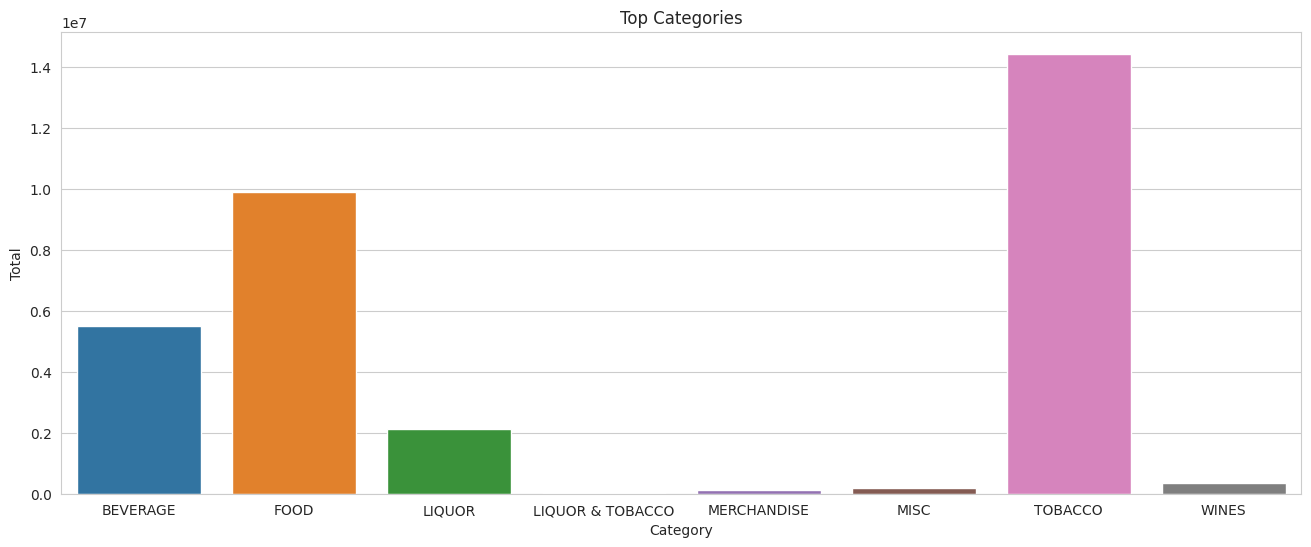

In [90]:
x_vals = list(range(len(top_items)))

fig = plt.subplots(figsize=(16,6)); sns.set_style('whitegrid')
sns.barplot(data=top_items, y='Total', x='Category' )
plt.xticks(x_vals, top_items['Category'])
plt.title("Top Categories")
plt.show()

### Create year-month column

In [91]:
raw_data['year-month'] = pd.Series(raw_data['Date'].dt.year.astype(str) + '-' + raw_data['Date'].dt.month.astype(str) + '-1')
raw_data['year-month'] = pd.to_datetime(raw_data['year-month'])
raw_data['year-quarter'] = pd.Series(raw_data['Date'].dt.year.astype(str) + ' - Q' + raw_data['Date'].dt.quarter.astype(str) )
raw_data['dayofweek'] = raw_data['Date'].dt.dayofweek

days = {0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

raw_data['dayofweek']  = raw_data['dayofweek'].map(days)

raw_data['Date'] = pd.to_datetime(raw_data['Date'])
raw_data['Time'] = pd.to_datetime(raw_data['Time'], format='%H:%M:%S')
raw_data['DateTime'] = pd.to_datetime(raw_data['Date'].dt.date.astype(str) + ' ' + raw_data['Time'].dt.time.astype(str))
raw_data['Hour'] = raw_data['DateTime'].dt.hour

hours = {0:'Night',	1:'Night',	2:'Night',	3:'Night',	4:'Night',	5:'Night',	6:'Morning',	7:'Morning',	8:'Morning',	9:'Morning',	10:'Morning',	11:'Morning',	12:'Afternoon',	13:'Afternoon',	14:'Afternoon',	15:'Afternoon',	16:'Afternoon',	17:'Afternoon',	18:'Evening',	19:'Evening',	20:'Evening',	21:'Evening',	22:'Evening',	23:'Night'}

raw_data['Session']  = raw_data['Hour'].map(hours)

isweekend ={'Monday': 'Not Weekend',
'Tuesday': 'Not Weekend',
'Wednesday': 'Not Weekend',
'Thursday': 'Not Weekend',
'Friday': 'Weekend',
'Saturday': 'Weekend',
'Sunday': 'Weekend'}

raw_data['IsWeekend']  = raw_data['dayofweek'].map(isweekend)

raw_data.sample(1)

,Date,Bill_Number,Item_Desc,Time,Quantity,Rate,Tax,Discount,Total,Category,year-month,year-quarter,dayofweek,DateTime,Hour,Session,IsWeekend
58621,2010-05-13,G0476835,N R G HOOKAH,1900-01-01 19:34:38,1,375.0,120.0,0.0,495.0,TOBACCO,2010-05-01,2010 - Q2,Thursday,2010-05-13 19:34:38,19,Evening,Not Weekend


### Sales roll up for time based EDA

In [92]:
pd.date_range(start='2010-4-1', end='2011-3-1', freq='MS')

DatetimeIndex(['2010-04-01', '2010-05-01', '2010-06-01', '2010-07-01',
               '2010-08-01', '2010-09-01', '2010-10-01', '2010-11-01',
               '2010-12-01', '2011-01-01', '2011-02-01', '2011-03-01'],
              dtype='datetime64[ns]', freq='MS')

In [93]:
def format_millions(x):
    return 'M{:,.2f}'.format(x / 1000000)

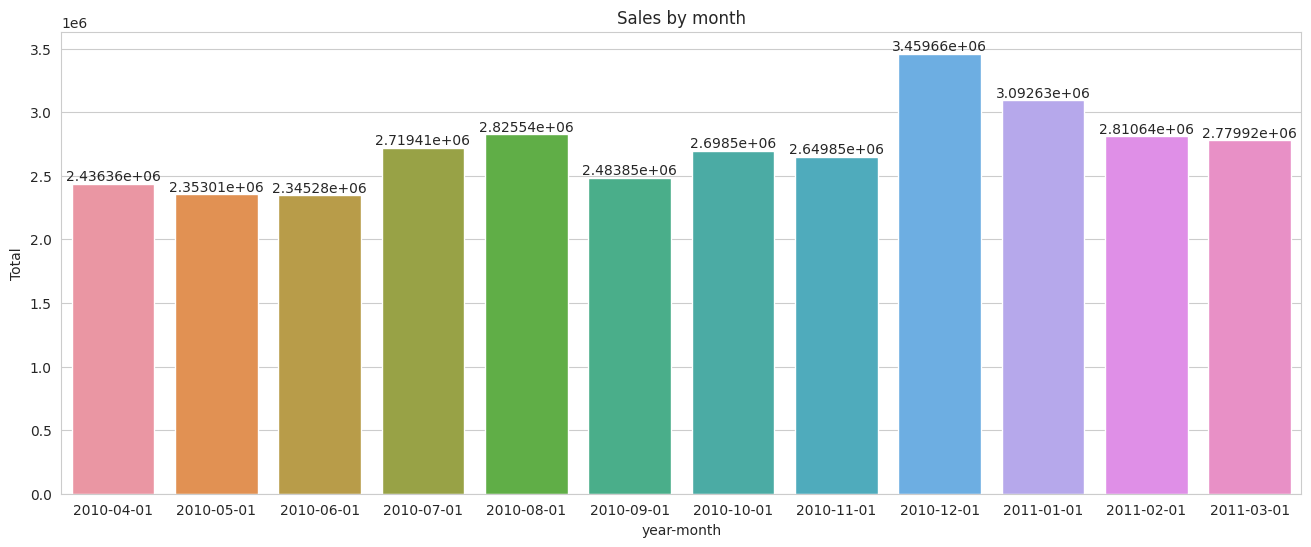

In [94]:
data_lables = (raw_data.groupby('year-month')['Total'].sum()).reset_index()
data_lables['Total_M'] = data_lables['Total'].apply(format_millions)

fig = plt.subplots(figsize=(16,6)); sns.set_style('whitegrid')
ax = sns.barplot(data=raw_data, y='Total', x='year-month',estimator=sum, ci=False, order= ['2010-04-01', '2010-05-01', '2010-06-01', '2010-07-01',
               '2010-08-01', '2010-09-01', '2010-10-01', '2010-11-01',
               '2010-12-01', '2011-01-01', '2011-02-01', '2011-03-01'])
ax.bar_label(ax.containers[0])
plt.title("Sales by month")
plt.show()

In [95]:
data_lables

,year-month,Total,Total_M
0,2010-04-01,2436355.71,M2.44
1,2010-05-01,2353007.82,M2.35
2,2010-06-01,2345284.32,M2.35
3,2010-07-01,2719406.39,M2.72
4,2010-08-01,2825539.73,M2.83
5,2010-09-01,2483845.63,M2.48
6,2010-10-01,2698502.20,M2.70
7,2010-11-01,2649848.84,M2.65
8,2010-12-01,3459656.05,M3.46
9,2011-01-01,3092632.65,M3.09


In [96]:
ax.containers[0]

<BarContainer object of 12 artists>

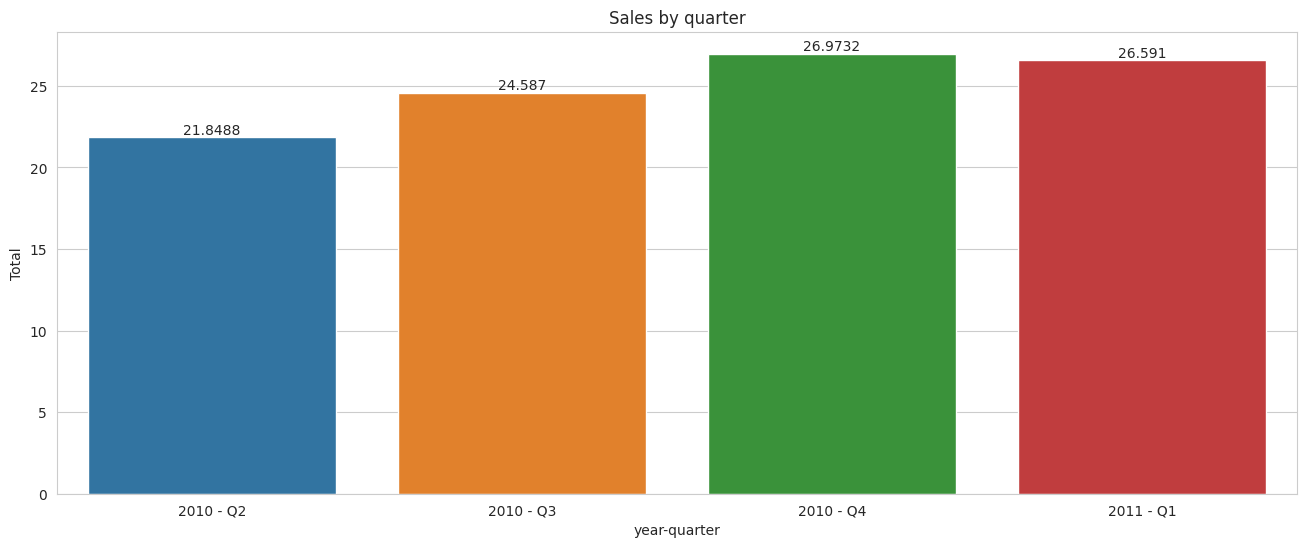

In [97]:
raw_data['overall-sales'] = raw_data['Total'].sum()

data_lables = (raw_data.groupby('year-quarter')['Total'].sum()/raw_data['overall-sales'].unique() * 100).reset_index()

fig = plt.subplots(figsize=(16,6)); sns.set_style('whitegrid')
ax = sns.barplot(data=data_lables, y='Total', x='year-quarter', estimator=sum, ci=False)
ax.bar_label(ax.containers[0])
plt.title("Sales by quarter")
plt.show()

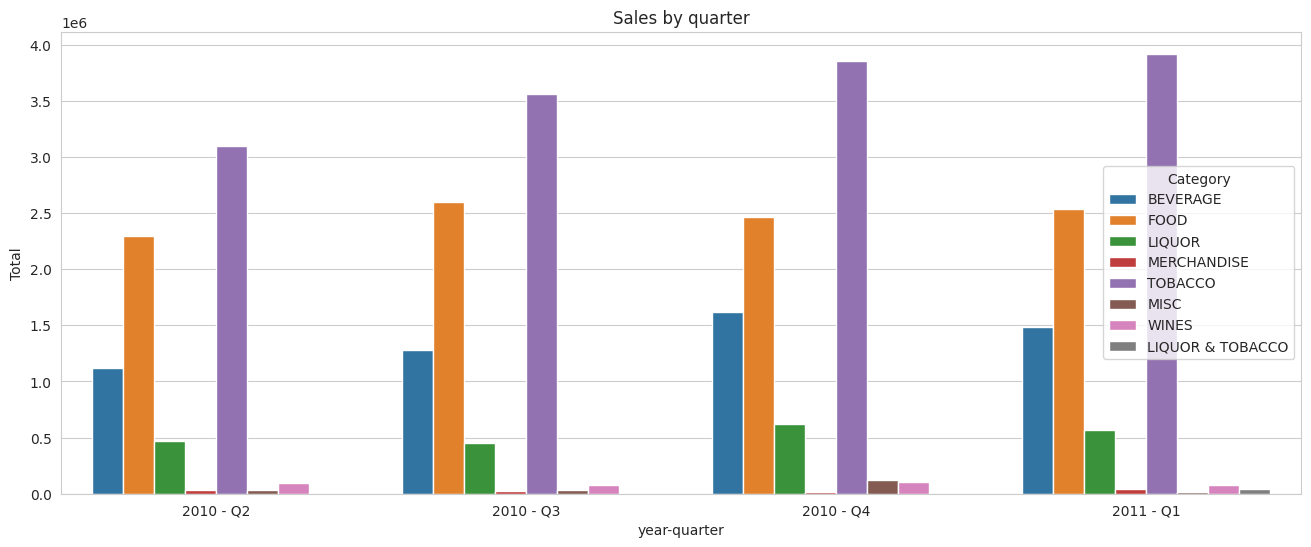

In [98]:
fig = plt.subplots(figsize=(16,6)); sns.set_style('whitegrid')
ax = sns.barplot(data=raw_data, y='Total', x='year-quarter', estimator=sum, ci=False, hue='Category')

plt.title("Sales by quarter")
plt.show()

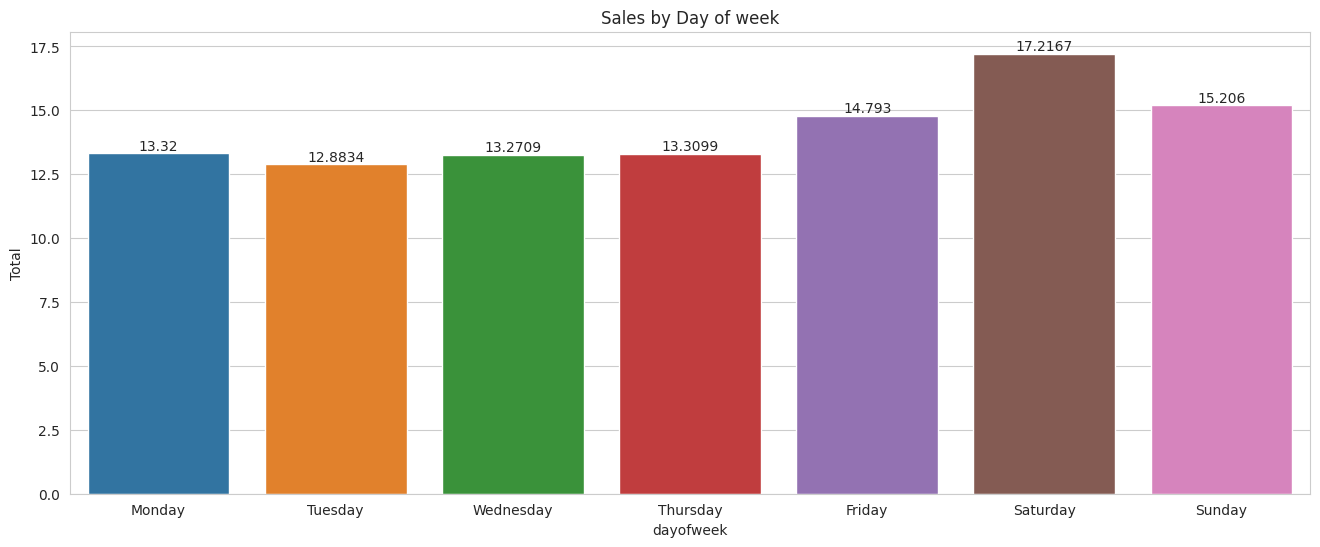

In [99]:
data_lables = (raw_data.groupby('dayofweek')['Total'].sum()/raw_data['overall-sales'].unique() * 100).reset_index()

fig = plt.subplots(figsize=(16,6)); sns.set_style('whitegrid')
ax = sns.barplot(data=data_lables, y='Total', x='dayofweek', estimator=sum, ci=False, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.bar_label(ax.containers[0])
plt.title("Sales by Day of week")
plt.show()

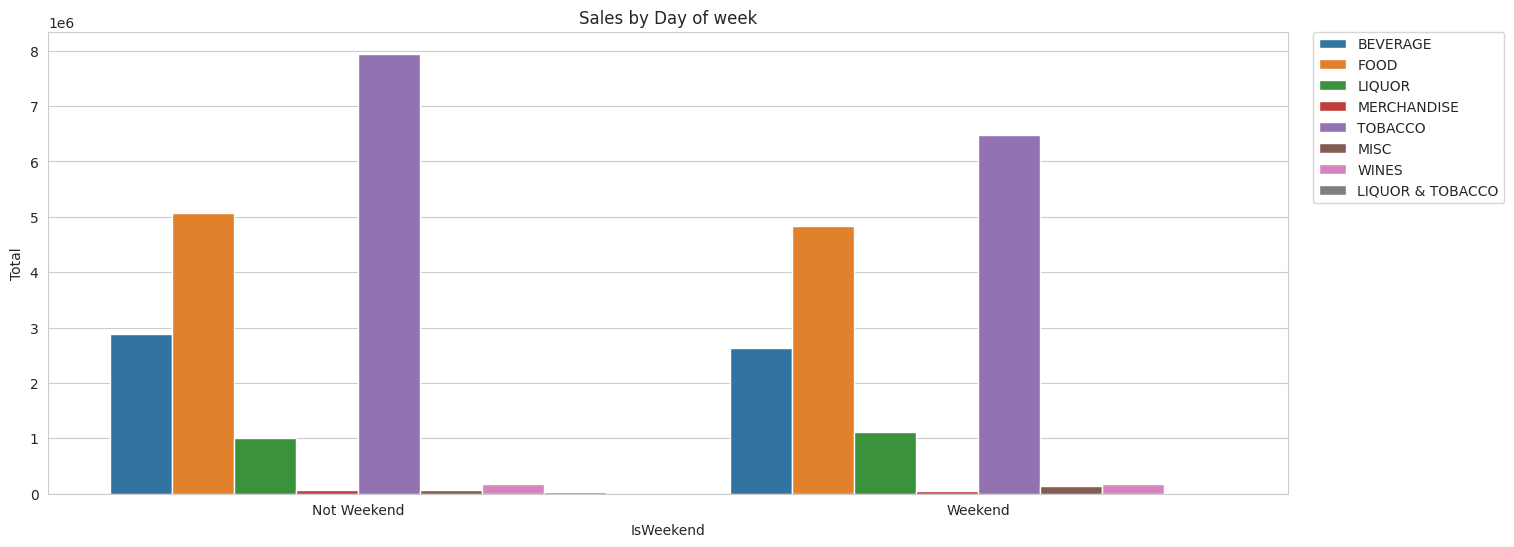

In [100]:
fig = plt.subplots(figsize=(16,6)); sns.set_style('whitegrid')
ax = sns.barplot(data=raw_data, y='Total', x='IsWeekend', estimator=sum, ci=False, order=['Not Weekend', 'Weekend'], hue='Category')
plt.title("Sales by Day of week")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

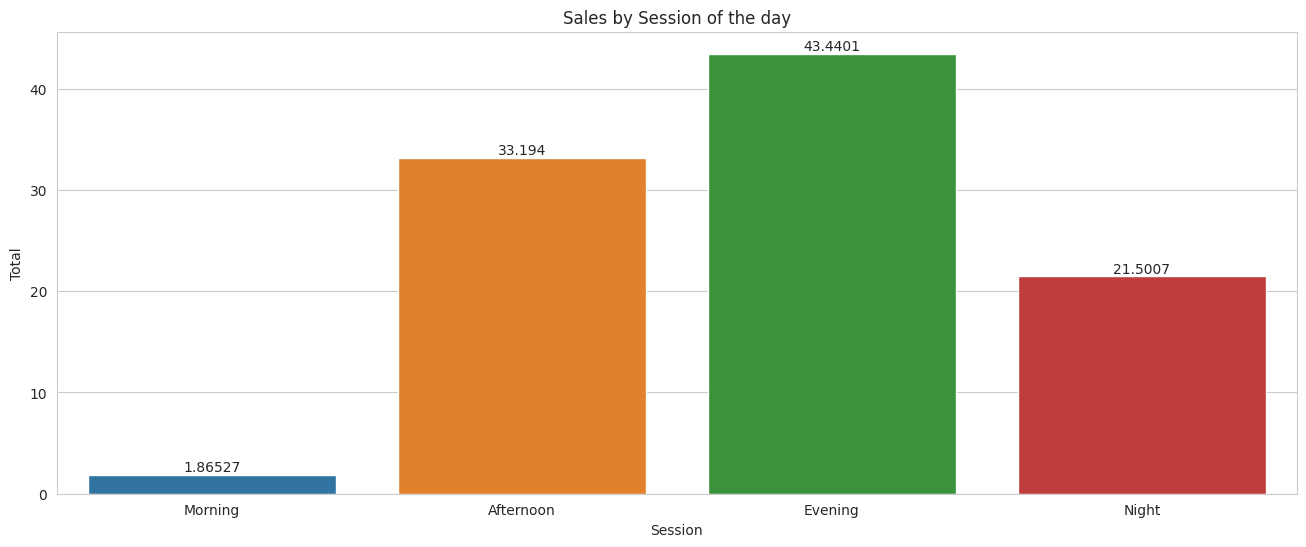

In [101]:
data_lables = (raw_data.groupby('Session')['Total'].sum()/raw_data['overall-sales'].unique() * 100).reset_index()

fig = plt.subplots(figsize=(16,6)); sns.set_style('whitegrid')
ax = sns.barplot(data=data_lables, y='Total', x='Session', estimator=sum, ci=False, order=['Morning','Afternoon','Evening','Night'])
ax.bar_label(ax.containers[0])
plt.title("Sales by Session of the day")
plt.show()

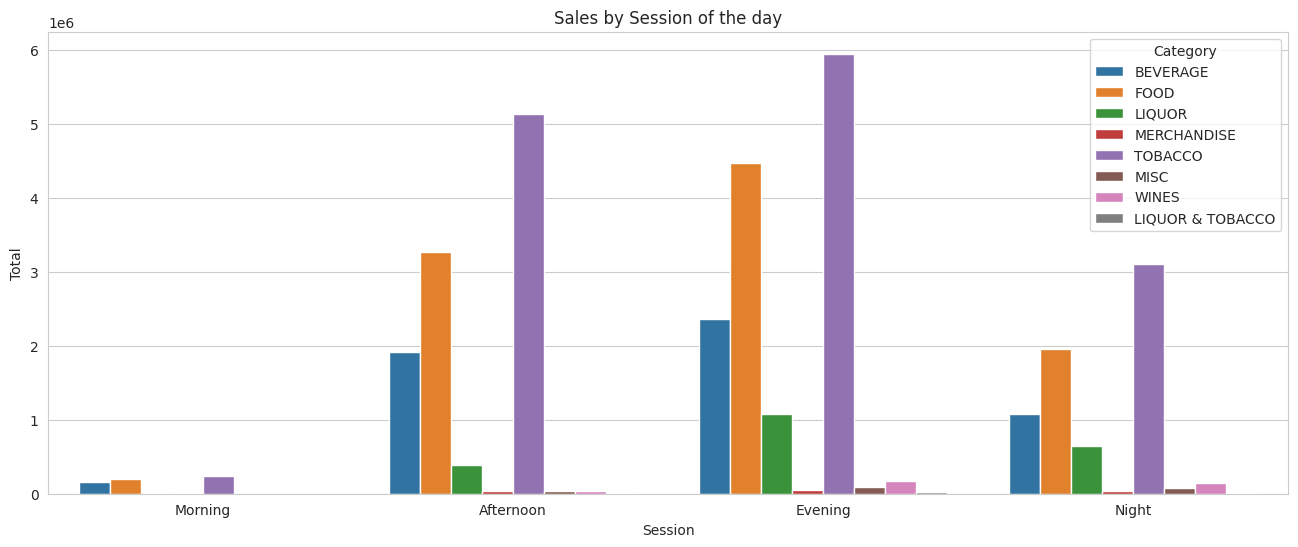

In [102]:
fig = plt.subplots(figsize=(16,6)); sns.set_style('whitegrid')
ax = sns.barplot(data=raw_data, y='Total', x='Session', estimator=sum, ci=False, order=['Morning','Afternoon','Evening','Night'], hue='Category')
plt.title("Sales by Session of the day")
plt.show()

### Check for outliers in the data

Quantity


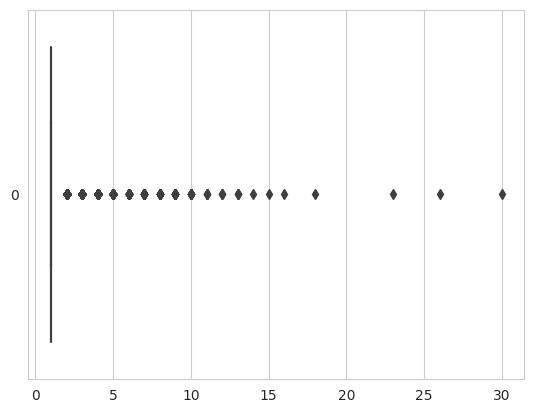

Rate


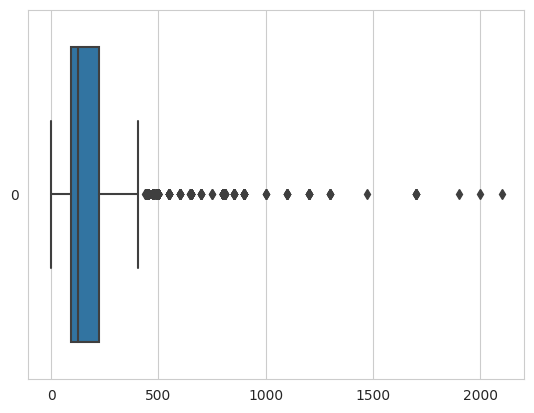

Tax


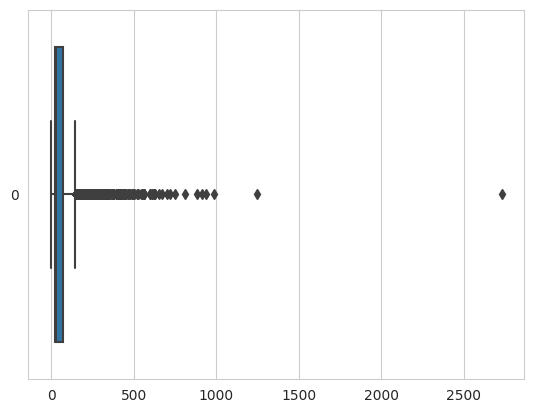

Discount


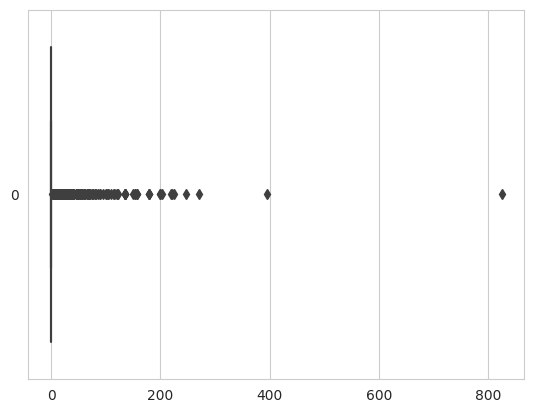

Total


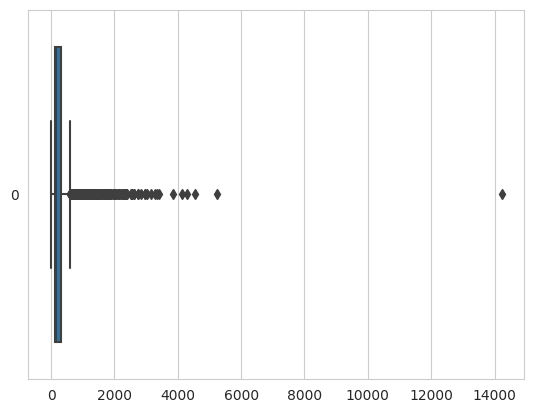

In [103]:
eda = pd.DataFrame()

eda = raw_data[['Quantity', 'Rate', 'Tax', 'Discount', 'Total']]
for col in eda.columns:
    print(col)
    sns.boxplot(data=eda[col], orient='horizontal')
    plt.show()

Quantity


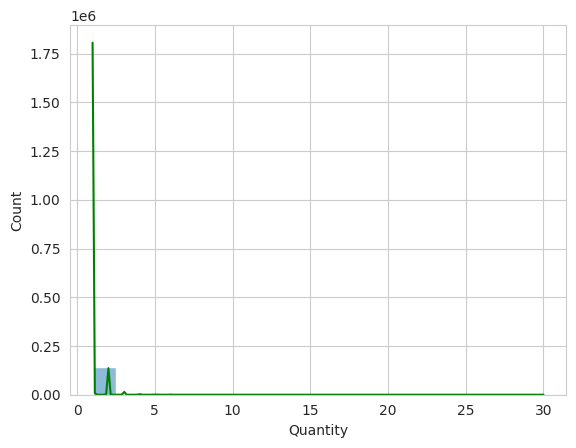

Rate


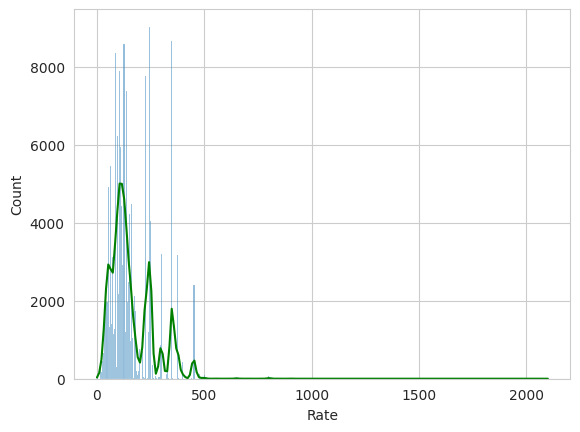

Tax


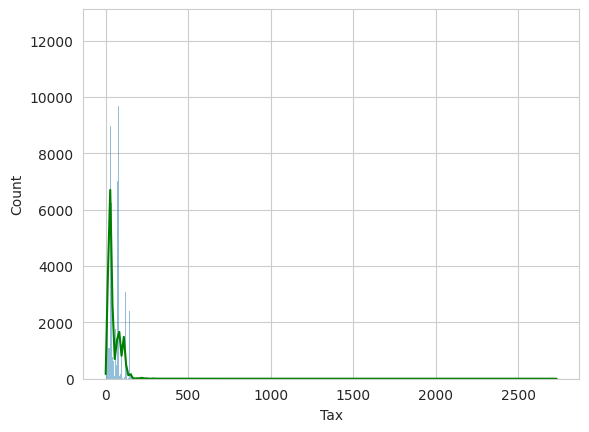

Discount


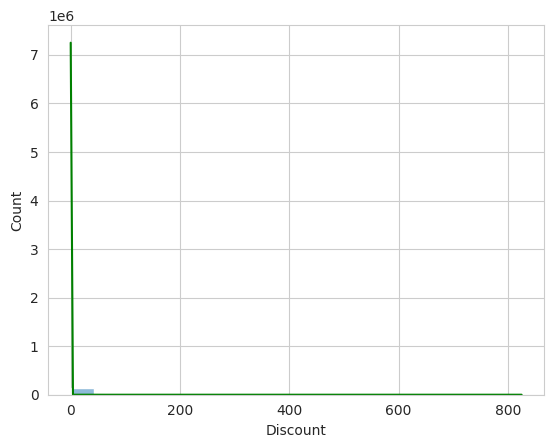

Total


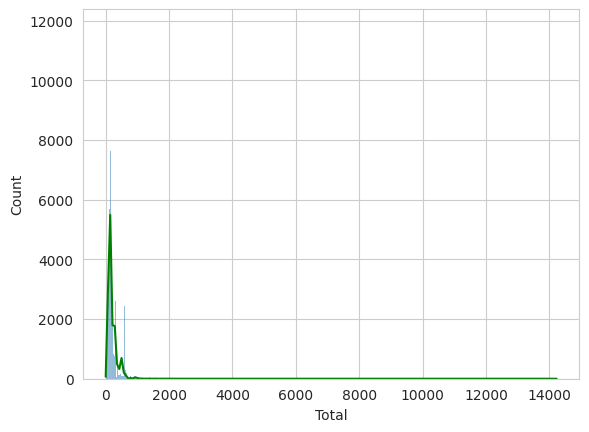

In [104]:
for col in eda.columns:
    print(col)
    ax = sns.histplot(data=eda[col],  kde=True)
    ax.lines[0].set_color('green')
    plt.show()

In [105]:
raw_data.to_csv('../data/eda_output.csv')